In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
ufo_df = pd.read_csv("scrubbed.csv")
mil_df = pd.read_csv("military-bases.csv")
sizes_df = pd.read_csv("state-areas.csv")

state_mapping = {
    'al': 'Alabama', 'ak': 'Alaska', 'az': 'Arizona', 'ar': 'Arkansas', 'ca': 'California',
    'co': 'Colorado', 'ct': 'Connecticut', 'de': 'Delaware', 'fl': 'Florida', 'ga': 'Georgia',
    'hi': 'Hawaii', 'id': 'Idaho', 'il': 'Illinois', 'in': 'Indiana', 'ia': 'Iowa', 'ks': 'Kansas',
    'ky': 'Kentucky', 'la': 'Louisiana', 'me': 'Maine', 'md': 'Maryland', 'ma': 'Massachusetts',
    'mi': 'Michigan', 'mn': 'Minnesota', 'ms': 'Mississippi', 'mo': 'Missouri', 'mt': 'Montana',
    'ne': 'Nebraska', 'nv': 'Nevada', 'nh': 'New Hampshire', 'nj': 'New Jersey', 'nm': 'New Mexico',
    'ny': 'New York', 'nc': 'North Carolina', 'nd': 'North Dakota', 'oh': 'Ohio', 'ok': 'Oklahoma',
    'or': 'Oregon', 'pa': 'Pennsylvania', 'ri': 'Rhode Island', 'sc': 'South Carolina', 'sd': 'South Dakota',
    'tn': 'Tennessee', 'tx': 'Texas', 'ut': 'Utah', 'vt': 'Vermont', 'va': 'Virginia',
    'wa': 'Washington', 'wv': 'West Virginia', 'wi': 'Wisconsin', 'wy': 'Wyoming'
}

ufo_df['datetime'] = ufo_df['datetime'].str.replace('24:00', '00:00')
ufo_df['datetime'] = pd.to_datetime(ufo_df['datetime'], format='%m/%d/%Y %H:%M')
ufo_df['year'] = ufo_df['datetime'].dt.year
ufo_df = ufo_df[ufo_df['year'] >=2000]
ufo_df = ufo_df[ufo_df['state']!='pr']
ufo_df = ufo_df[ufo_df['state']!='dc']
ufo_df = ufo_df[ufo_df['country']=='us']
ufo_df['state'] = ufo_df['state'].map(state_mapping)


mil_df = mil_df[mil_df['State Terr'] != "Guam"]
mil_df = mil_df[mil_df['State Terr'] != "District of Columbia"]
mil_df = mil_df[mil_df['State Terr'] != "Puerto Rico"]

sizes_df = sizes_df[sizes_df['state'] !="District of Columbia"]
sizes_df = sizes_df[sizes_df['state'] !="Puerto Rico"]

ufoPerState = ufo_df['state'].value_counts()
milPerState = mil_df['State Terr'].value_counts()


ufoPerState_df = ufoPerState.rename('UFOCount').reset_index()
milPerState_df = milPerState.rename('MilitaryBaseCount').reset_index()

data = pd.merge(ufoPerState_df,milPerState_df,on="index",how="outer")

data = data.rename(columns={'index': 'State'})
sizes_df = sizes_df.rename(columns={'state': 'State'})

data = pd.merge(data,sizes_df,on="State",how="outer")

data['UFOCountPerSqMi'] = data['UFOCount']/data['area (sq. mi)']

data

/srv/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3548: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


State  UFOCount  MilitaryBaseCount  area (sq. mi)  \
0       California      7285                 73         163707   
1          Florida      3296                 41          65758   
2       Washington      3102                 20          71303   
3            Texas      2755                 42         268601   
4         New York      2319                 17          54475   
5         Illinois      2066                 14          57918   
6          Arizona      2011                 19         114006   
7     Pennsylvania      1931                 16          46058   
8             Ohio      1790                 15          44828   
9   North Carolina      1470                 16          53821   
10        Michigan      1413                  9          96810   
11          Oregon      1401                 11          98386   
12        Colorado      1165                 10         104100   
13        Missouri      1145                 13          69709   
14         Indiana      1058                 11          36420   
15        Virginia      1052                 42          42769   
16         Georgia      1031                 20          59441   
17   Massachusetts      1024                 10          10555   
18      New Jersey      1005                 10           8722   
19       Wisconsin       983                  7          65503   
20       Tennessee       915                 15          42146   
21  South Carolina       892                 14          32007   
22       Minnesota       839                 10          86943   
23     Connecticut       725                  5           5544   
24        Maryland       686                 25          12407   
25        Kentucky       685                  6          40411   
26          Nevada       628                 13         110567   
27        Oklahoma       596                 15          69903   
28      New Mexico       577                 10         121593   
29            Iowa       558                  5          56276   
30            Utah       503                 11          84904   
31         Alabama       502                 32          52423   
32          Kansas       495                  7          82282   
33        Arkansas       468                  5          53182   
34           Maine       439                  7          35387   
35       Louisiana       437                 14          51843   
36           Idaho       432                  7          83574   
37   New Hampshire       403                  4           9351   
38         Montana       382                  5         147046   
39   West Virginia       356                  8          24231   
40        Nebraska       311                  8          77358   
41     Mississippi       278                 12          48434   
42          Alaska       242                 15         656425   
43         Vermont       234                  5           9615   
44          Hawaii       220                 39          10932   
45    Rhode Island       188                  5           1545   
46    South Dakota       144                  7          77121   
47        Delaware       136                  4           1954   
48         Wyoming       135                  3          97818   
49    North Dakota        91                  7          70704   

    UFOCountPerSqMi  
0          0.044500  
1          0.050123  
2          0.043504  
3          0.010257  
4          0.042570  
5          0.035671  
6          0.017639  
7          0.041925  
8          0.039930  
9          0.027313  
10         0.014596  
11         0.014240  
12         0.011191  
13         0.016425  
14         0.029050  
15         0.024597  
16         0.017345  
17         0.097016  
18         0.115226  
19         0.015007  
20         0.021710  
21         0.027869  
22         0.009650  
23         0.130772  
24         0.055291  
25         0.016951  
26         0.005680  
27         0.008526  
28      

### 

In [4]:
#Central Tendencies for UFOs
mean_ufo_per_state=np.mean(ufoPerState)
median_ufo_per_state=np.median(ufoPerState)

#Variability for UFOs
var_ufo_per_state=np.var(ufoPerState,ddof=1)
stdev_ufo_per_state=np.std(ufoPerState,ddof=1)
q3_ufo_per_state, q1_ufo_per_state=np.percentile(ufoPerState, [75 ,25])
IQR_ufo_per_state=q3_ufo_per_state-q1_ufo_per_state


#Central Tendencies for military bases
mean_mil_per_state=np.mean(milPerState)
median_mil_per_state=np.median(milPerState)

#Variability for military bases
var_mil_per_state=np.var(milPerState,ddof=1)
stdev_mil_per_state=np.std(milPerState,ddof=1)
q3_mil_per_state, q1_mil_per_state=np.percentile(milPerState, [75 ,25])
IQR_mil_per_state=q3_mil_per_state-q1_mil_per_state

#Calculating UFO sightings per military base
ufo_per_mil=ufoPerState/milPerState

#Central Tendency for UFO sightings per military base
mean_ufo_per_mil=np.mean(ufo_per_mil)

#Variability for UFO sightings per military base
stdev_ufo_per_mil=np.std(ufo_per_mil,ddof=1)

In [5]:
#VISUALIZATIONS

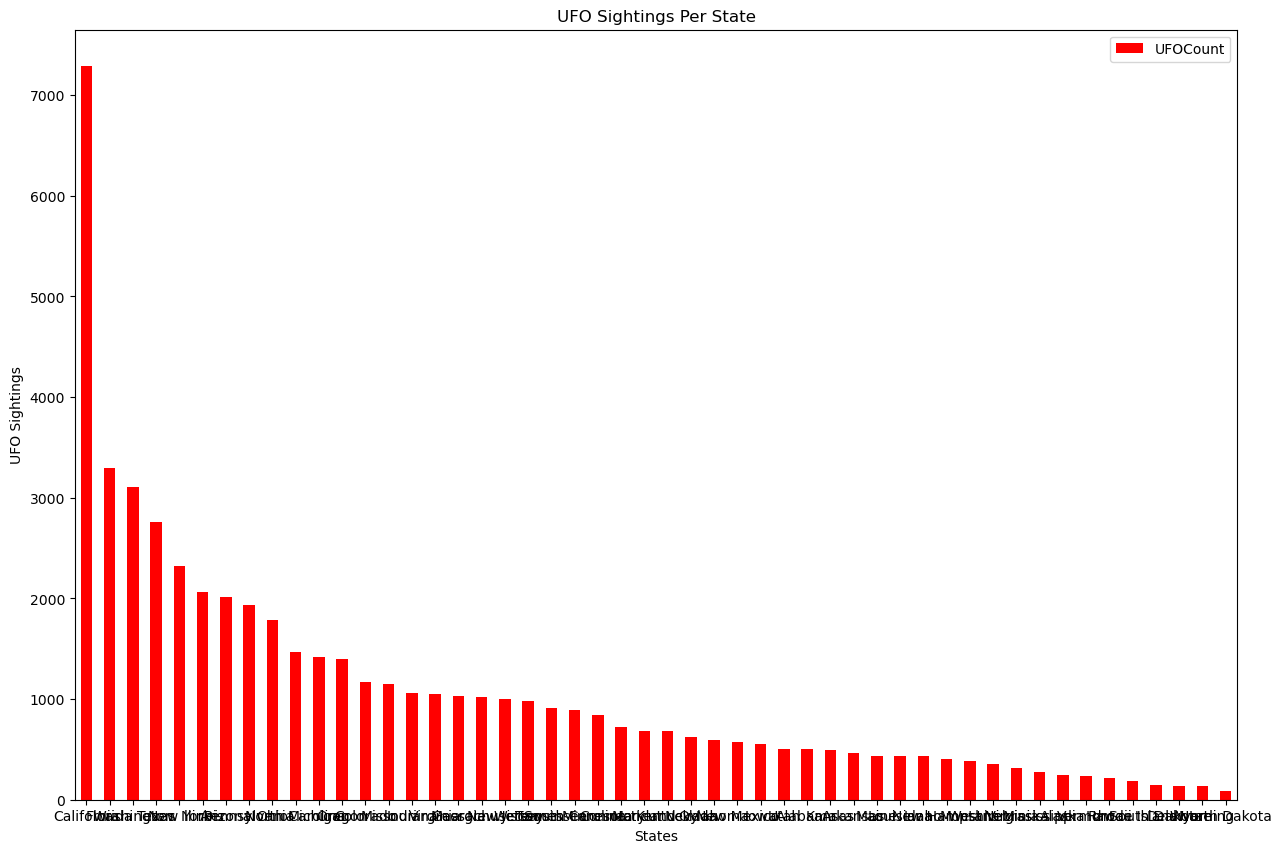

In [17]:
#PLOT 1 - BAR PLOT
data.plot.bar(x='State', y='UFOCount', rot=0, color = 'red', figsize=(15, 10)) 

# Set labels and title for UFO Sightings Bar Chart
plt.xlabel("States")
plt.ylabel("UFO Sightings")

#HAVING AN ISSUE ROTATING THE XLABELS OF THE GRAPH, NEED HELP!!!
#plt.xticks(data['State'].tolist())
#plt.xticklabels(data['State'].tolist(), rotation=270)
#plt.xticks(x='State', data['State'].tolist(), rotation='vertical')

plt.title("UFO Sightings Per State")
plt.show()

In [7]:
#supporting paragraph for PLOT 1
#Based on this Bar Plot, it can be seen that there seems to be a much higher concentration of UFO Sightings in
#California compared to all the other states. It seems that most states have around around 1000 or so UFO Sightings.
#This value is much different than the peak seen in California's Number of UFO Sightings.

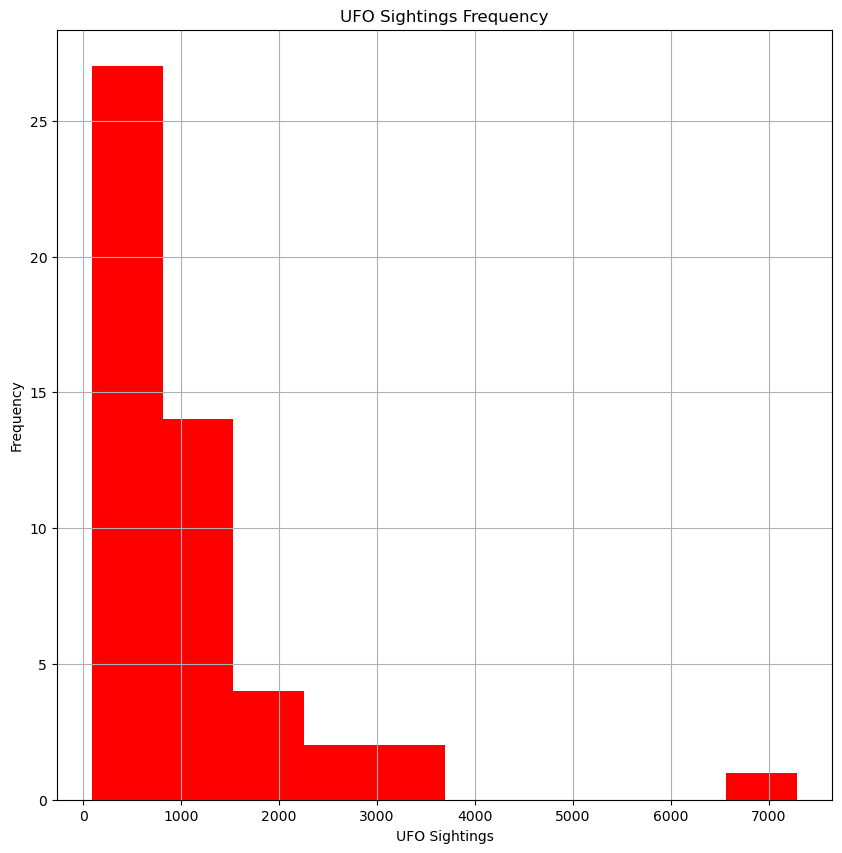

In [16]:
#PLOT 2 - HISTOGRAM
data.hist('UFOCount', bins=10, figsize=(10, 10), color = 'red', backend=None) 

# Set labels and title for UFO Sightings Bar Chart
plt.xlabel("UFO Sightings")
plt.ylabel("Frequency")
plt.title("UFO Sightings Frequency")
plt.show()

In [9]:
#supporting paragraph for PLOT 2
#It can be seen that there is a peak in frequency of there being less than 1000 UFO Sightings in a state. Based on
#the histogram, it can also be said that the median of the number of UFO Sightings ranges from 0-1000.

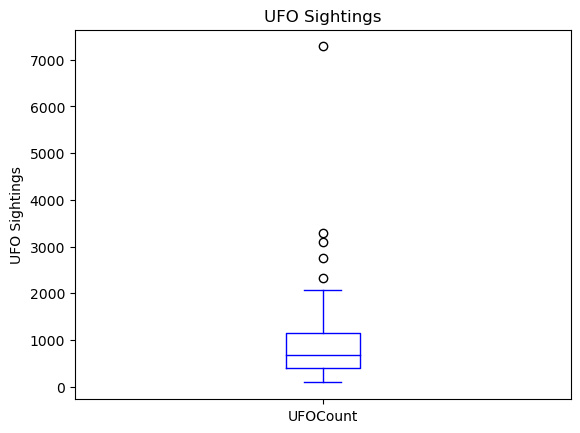

In [10]:
#PLOT 3 - BLANK
data['UFOCount'].plot(kind='box', color='blue', title='title_of_plot')

# Set labels and title for Scatterplot
plt.ylabel("UFO Sightings")

plt.title("UFO Sightings")
plt.show()

In [11]:
#paragraph for plot 3
#Based on the Box plot, it can be seen that the median number of UFO sightings is less than 1000 per state.

/srv/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


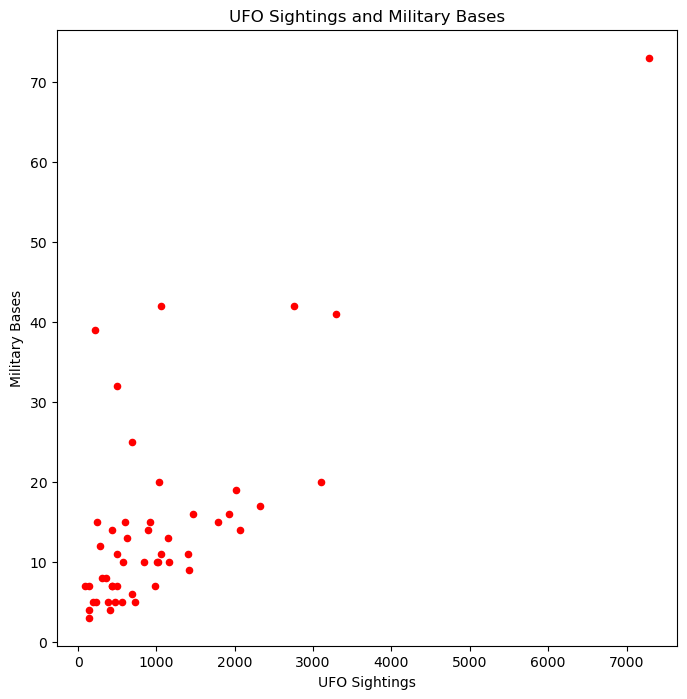

In [12]:
#SCATTERPLOT
data.plot.scatter(x='UFOCount', y='MilitaryBaseCount', color='red', figsize=(8, 8))

# Set labels and title for Scatterplot
plt.xlabel("UFO Sightings")
plt.ylabel("Military Bases")


plt.title("UFO Sightings and Military Bases")
plt.show()

In [13]:
#supporting paragraph for SCATTERPLOT
#Based on the scatterplot shown above, we can see that the number of military bases and the number of UFO Sightings
#seem to have some sort of relationship as there is a concentration near the bottom of the graph and it seems to
#be linear if a line of best fit was to be drawn. We can also see that there are some serious outliers in the graph
#in the top right, which seems to be out of range compared to the rest of the two datasets in comparison.

In [14]:
#INDEPENDENCE CALCULATIONS
#calculate covariance
covariance = data['UFOCount'].cov(data['MilitaryBaseCount'])
#calculate correlation
correlation = data['UFOCount'].corr(data['MilitaryBaseCount'])
print ('The Covariance between # of UFO Sightings and # of Military Bases is ' + str(round (covariance, 3)) + ' UNITS')
print ('The Correlation between # of UFO Sightings and # of Military Bases is ' + str(round (correlation, 3)))

The Covariance between # of UFO Sightings and # of Military Bases is 11516.261 UNITS
The Correlation between # of UFO Sightings and # of Military Bases is 0.747


In [15]:
#supporting paragraph for DEPENDENCE/INDEPENDENCE CALCULATIONS
#Given that the covariance between the 2 sets (# of UFO Sightings and # of Military Bases) is 
#highly positive and is a large number, it can be said that the relationship is postive and 
#therefore a more direct relationship between the two datasets. When it comes to the correlation, it is a positive number 
#that is close to 1, therefore also indicating a more direct relationship. We know that a correlation coefficient of 1
#will result in a perfectly direct relationship, so a correlation coeffiecient of the number we received is somewhat
#close to a direct relationship between the two datasets, # of UFO Sightings and the # of Military Bases. 
#Based on these calculations, it can be said that there is a dependent relationship between the # of UFO Sightings 
#and the # of Military Bases